 # Visualización del conjunto de datos
En este notebook se muestran algunos de los mecanismos más utilizados para la visualización del conjunto de datos.

## Conjunto de datos
### Descripción
NSL-KDD is a data set suggested to solve some of the inherent problems of the KDD'99 data set which are mentioned in. Although, this new version of the KDD data set still suffers from some of the problems discussed by McHugh and may not be a perfect representative of existing real networks, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods. Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable.

Sirve para clasificar tráfico de red en anómalo o malicioso y normal o legítimo. Se ha formado capturando tráfico de red agrupado en flujos (conjunto de paquetes de red que determinan una conexión o una sesión...), han generado tráfico de red malicioso y legítimo y lo han agrupado en flujos y cada fila es un flujo de nuestro tráfico de red.

Nuestro objetivo es entrenar un algoritmo con este conjunto de datos, de manera que pueda poner este algoritmo en nuestra red y sea capaz de identificar si el tráfico de red tiene anomalías y saltar una alarma.

Es muy utilizado para evaluar herramientas IDSs de detección de  intrusiones en red. Vamos a construir un modelo de aprendizaje automático.

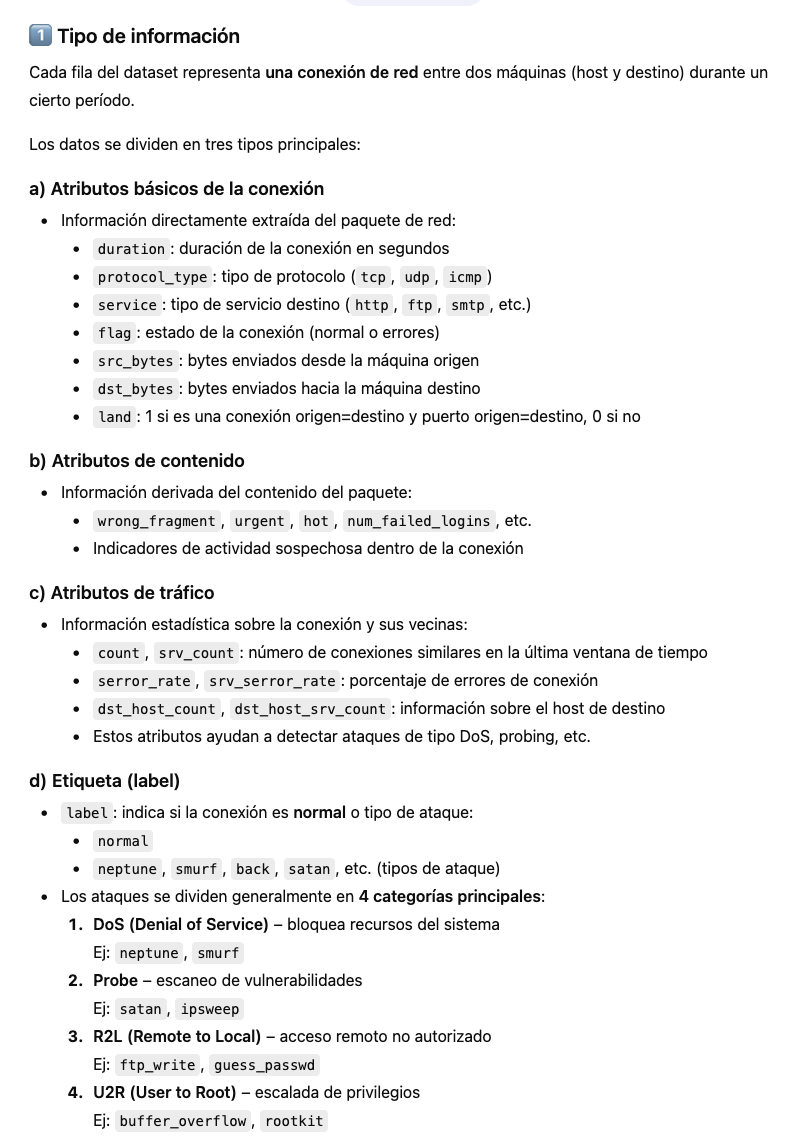

### Ficheros de datos
* <span style="color:green">**KDDTrain+.ARFF**: The full NSL-KDD train set with binary labels in ARFF format</span>
* <span style="color:green">**KDDTrain+.TXT**: The full NSL-KDD train set including attack-type labels and difficulty level in CSV format</span>
* KDDTrain+_20Percent.ARFF:	A 20% subset of the KDDTrain+.arff file
* KDDTrain+_20Percent.TXT:	A 20% subset of the KDDTrain+.txt file
* KDDTest+.ARFF:	The full NSL-KDD test set with binary labels in ARFF format
* KDDTest+.TXT:	The full NSL-KDD test set including attack-type labels and difficulty level in CSV format
* KDDTest-21.ARFF:	A subset of the KDDTest+.arff file which does not include records with difficulty level of 21 out of 21
* KDDTest-21.TXT:	A subset of the KDDTest+.txt file which does not include records with difficulty level of 21 out of 21

Nos van a interesar de momento los conjuntos de datos de entrentamiento (los que están en verde). Va a ser nuestro conjunto de datos completo, en ARF y TXT son los mismos datos pero con un formato distinto. El formato CSV es el más utilizado para almacenar ficheros de datos.

En CSV tendremos un montón de características de entrada separados por comas, y tendremos por filas los valores para cada característica, también separados por comas.

### Descarga de los ficheros de datos
https://iscxdownloads.cs.unb.ca/iscxdownloads/NSL-KDD/#NSL-KDD

https://www.kaggle.com/datasets/hassan06/nslkdd

### Referencias adicionales sobre el conjunto de datos
_M. Tavallaee, E. Bagheri, W. Lu, and A. Ghorbani, “A Detailed Analysis of the KDD CUP 99 Data Set,” Submitted to Second IEEE Symposium on Computational Intelligence for Security and Defense Applications (CISDA), 2009._

## 1. Lectura del conjunto de datos


In [26]:
# Lectura del conjunto de datos mediante funciones de Python
with open("datasets/NSL-KDD/KDDTrain+.txt") as train_set:
    df = train_set.readlines()
df

['0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20\n',
 '0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.00,0.00,0.00,0.00,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15\n',
 '0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.00,1.00,0.00,0.00,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19\n',
 '0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.20,0.20,0.00,0.00,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21\n',
 '0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.00,0.00,0.00,0.00,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21\n',
 '0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.00,0.00,1.00,1.00,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21\n',
 '0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Cada línea tiene los valores de las características de entrada separadas por comas. Cada línea será un flujo.

In [27]:
# Lectura del conjunto de datos utilizando Pandas
import pandas as pd

df = pd.read_csv("datasets/NSL-KDD/KDDTrain+.txt")
df

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


Pandas nos hace todo más amigable. Obtenemos, por una parte el número de ejemplos que tenemos y también el número de columnas (características y salida).
Este fichero no trae los nombres de las características de entrada y Pandas ha considerado que la primera fila eran los nombres, pero no lo son, son los valores del primer flujo o ejemplo del conjunto de datos.

An **ARFF (Attribute-Relation File Format)** file is an ASCII text file that describes a list of instances sharing a set of attributes. ARFF files were developed by the Machine Learning Project at the Department of Computer Science of The University of Waikato for use with the Weka machine learning software. Más información: https://www.cs.waikato.ac.nz/ml/weka/arff.html

In [28]:
# Instalamos un nuevo paquete externo para poder leer ficheros arff
!pip install liac-arff

In [32]:
import arff
import pandas as pd

# Nombres de columnas del NSL-KDD
COLUMNS = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
    'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
    'root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
    'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate',
    'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
    'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
    'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate',
    'label'
]

def load_kdd_dataset(data_path):
    dataset_gen = arff.load(data_path)  # Generador de filas
    data = list(dataset_gen)            # Convertir a lista de tuplas
    df = pd.DataFrame(data, columns=COLUMNS)
    return df

df_orig = load_kdd_dataset("datasets/NSL-KDD/KDDTrain+.arff")

Nos va a interesar la clave data con todos los datos de nuestro conjunto y la clave attributes que tendrá las características de entrada.

In [33]:
df_orig

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8.0,udp,private,SF,105.0,145.0,0,0.0,0.0,0.0,...,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0.0,tcp,smtp,SF,2231.0,384.0,0,0.0,0.0,0.0,...,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0.0,tcp,klogin,S0,0.0,0.0,0,0.0,0.0,0.0,...,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


Los nombres que establezco en el DataFrame son los atributos extraídos del arff.

Llegados a este punto lo ideal es construir una función que permita leer el conjunto de datos de manera más limpia. Este tipo de prácticas son de gran utilidad para que nuestro código en el Jupyter Notebook sea más modular y pueda reutilizarse de manera más sencilla para futuros ejercicios.

## 2. Funciones básicas de visualización de los datos
* El proceso de visualización siempre debe realizarse sobre el trainning set y apartando el test set. Esto evita que nuestro cerebro genere intuiciones del test set que podemos incorporar en nuestro modelo
* Una buena práctica es crear una copia del trainning set y jugar con ella. De esta manera, si realizamos transformaciones que dañan el tranning set, el original no se ve afectado

In [34]:
# Lectura y copia del conjunto de datos
df = df_orig.copy()

In [35]:
# Mostrar en pantalla un número determinado de filas
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0.0,tcp,private,REJ,0.0,0.0,0,0.0,0.0,0.0,...,19.0,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,9.0,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0.0,tcp,remote_job,S0,0.0,0.0,0,0.0,0.0,0.0,...,23.0,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,...,13.0,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [36]:
# Mostrar información básica sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

In [37]:
# Mostrar información estadística sobre el conjunto de datos (características numéricas, no de las categóricas), para ver cómo están formadas las características, si tienen rangos dispares...
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# Mostrar los valores únicos que tiene un atributo determinado. Por ejemplo los categóricos que tienen distintos valores.
df["protocol_type"].value_counts()

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

In [39]:
df["label"].value_counts()

label
normal     67343
anomaly    58630
Name: count, dtype: int64

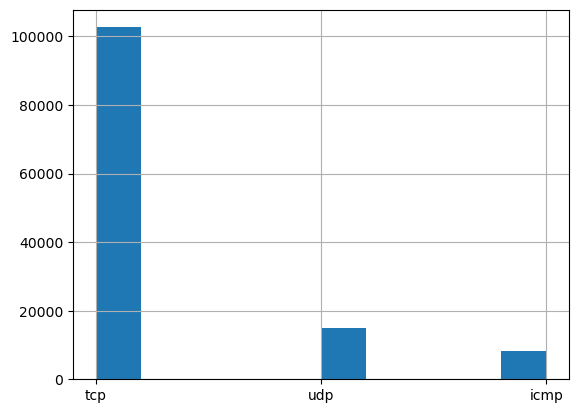

In [40]:
# Mostrar los valores de la característica como un histograma
%matplotlib inline
import matplotlib.pyplot as plt
df["protocol_type"].hist()
plt.show()

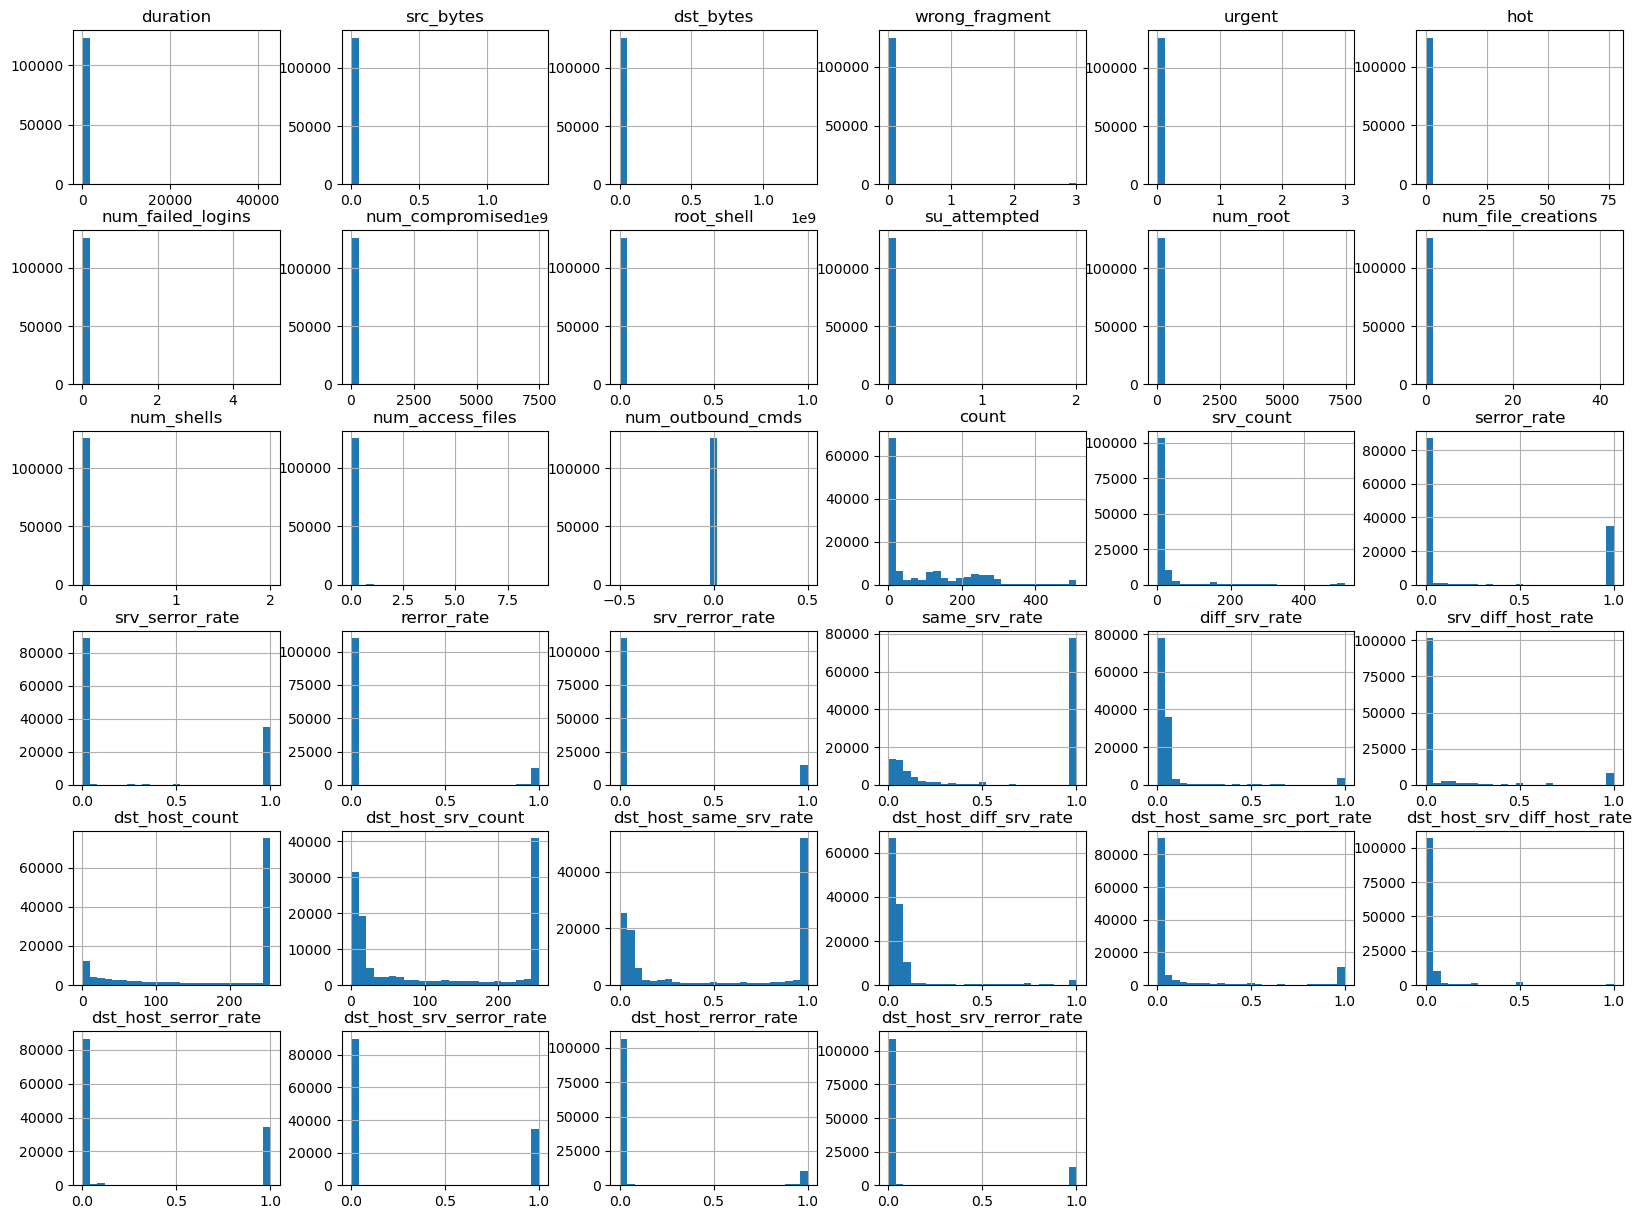

In [43]:
# Representar gráficamente la distribución de los atributos
df.hist(bins=25, figsize=(20,15))
plt.show()

## 3. Funciones avanzadas de visualización de los datos
### Buscando correlaciones
* Se puede calcular el coeficiente de correlación estándar para ver la correlación entre cada par de atributos
* El coeficiente de correlación, solo mide **correlaciones lineales**, esto quiere decir que si x va hacia arriba, mediría si y va hacia arriba o hacia abajo.
* **Hay que intentar buscar correlaciones sobre todo con el atributo objetivo (el que queremeos predecir), en este caso _class_**

Esto es útil porque podemos medir la correlación entre los atributos de entrada y la variable de salida y de esa forma sabemos que si hay correlación el atributo es bastante relevante.
También podemos medir la correlación entre distintas variables de entrada y si esto ocurre, podemos eliminar una característica porque nos dan la misma información y esto hace que sea más eficiente a nivel computacional.

In [44]:
# El atributo class de nuestro conjunto de datos tiene valores categoricos
df["label"]

0          normal
1          normal
2         anomaly
3          normal
4          normal
           ...   
125968    anomaly
125969     normal
125970     normal
125971    anomaly
125972     normal
Name: label, Length: 125973, dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder

# Transformamos los valores del atributo class de categoricos a numéricos
# Donde normal lo está estableciendo a 1 y la anómala a 0
labelencoder = LabelEncoder()
df["label"] = labelencoder.fit_transform(df["label"])

# Transformamos los valores de los atributos categóricos a numéricos
df["protocol_type"] = labelencoder.fit_transform(df["protocol_type"])
df["service"] = labelencoder.fit_transform(df["service"])
df["flag"] = labelencoder.fit_transform(df["flag"])

df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0.0,1,20,9,491.0,0.0,0,0.0,0.0,0.0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0.0,2,44,9,146.0,0.0,0,0.0,0.0,0.0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0.0,1,24,9,232.0,8153.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0.0,1,24,9,199.0,420.0,0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,1,49,5,0.0,0.0,0,0.0,0.0,0.0,...,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,8.0,2,49,9,105.0,145.0,0,0.0,0.0,0.0,...,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0.0,1,54,9,2231.0,384.0,0,0.0,0.0,0.0,...,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0.0,1,30,5,0.0,0.0,0,0.0,0.0,0.0,...,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


In [46]:
# Mostrar la correlación entre los atributos del conjunto de datos (correlación entre atributos y característica destino)
corr_matrix = df.corr()
corr_matrix["label"].sort_values(ascending=False)

label                          1.000000
same_srv_rate                  0.751913
dst_host_srv_count             0.722535
dst_host_same_srv_rate         0.693803
logged_in                      0.690171
flag                           0.647073
protocol_type                  0.281355
srv_diff_host_rate             0.119377
is_guest_login                 0.039279
num_access_files               0.036701
su_attempted                   0.022448
num_file_creations             0.021271
root_shell                     0.020285
hot                            0.013083
num_root                       0.011452
num_compromised                0.010198
num_shells                     0.009472
num_failed_logins              0.003755
urgent                         0.002787
is_host_login                  0.002629
srv_count                     -0.000771
dst_bytes                     -0.004118
src_bytes                     -0.005921
land                          -0.007191
duration                      -0.048785


Las características con más correlación serán más relevantes.

In [47]:
# Mostrar correlación lineal entre todos los atributos del conjunto de datos
df.corr()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
duration,1.000000,0.038241,0.092858,-0.063390,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,...,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,-0.048785
protocol_type,0.038241,1.000000,0.029994,0.093668,-0.000974,-0.000608,-0.001757,0.169535,-0.000965,-0.011857,...,0.103919,0.001702,0.131380,-0.209105,-0.356183,-0.079398,-0.077925,-0.015434,-0.046938,0.281355
service,0.092858,0.029994,1.000000,-0.304014,-0.001631,0.003596,-0.009952,0.084404,0.010980,-0.064066,...,-0.407696,-0.452696,0.284072,-0.111163,-0.156211,0.281635,0.277594,0.150666,0.148405,-0.276548
flag,-0.063390,0.093668,-0.304014,1.000000,-0.008114,-0.004096,-0.010373,0.067214,0.005811,0.068437,...,0.582687,0.630118,-0.283607,0.195689,0.073773,-0.443441,-0.443225,-0.683310,-0.718778,0.647073
src_bytes,0.070737,-0.000974,-0.001631,-0.008114,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,...,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.005921
dst_bytes,0.034878,-0.000608,0.003596,-0.004096,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,...,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.004118
land,-0.001553,-0.001757,-0.009952,-0.010373,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,...,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.007191
wrong_fragment,-0.009866,0.169535,0.084404,0.067214,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,...,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,-0.095905
urgent,0.003830,-0.000965,0.010980,0.005811,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,...,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,0.002787
hot,0.000705,-0.011857,-0.064066,0.068437,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,...,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670,0.013083


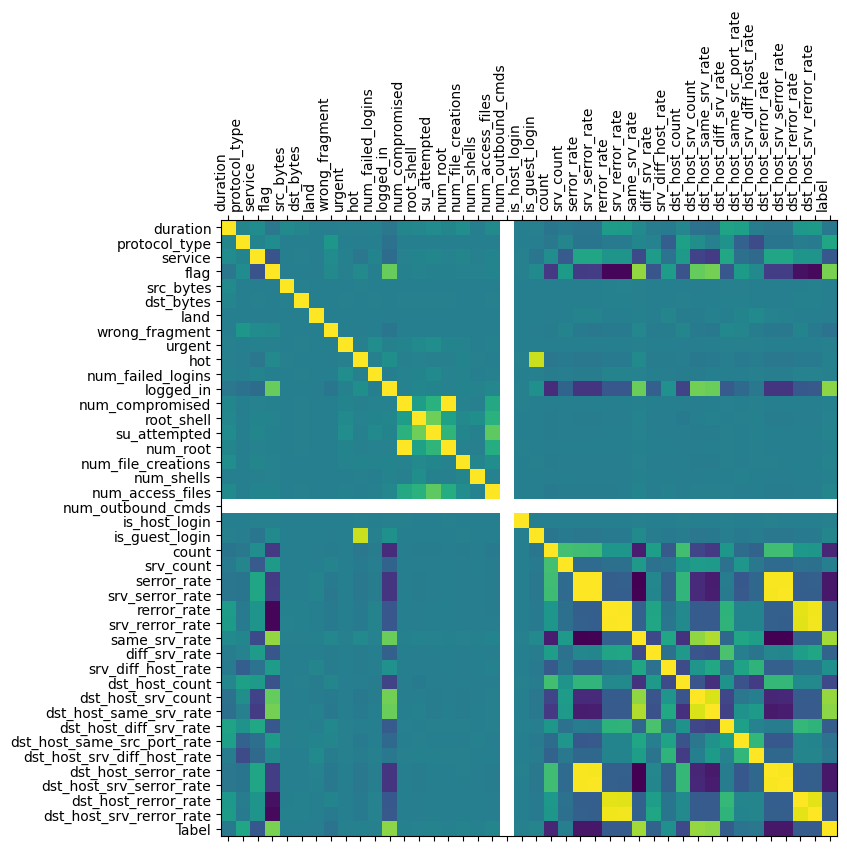

In [48]:
# Representar gráficamente la matriz de correlación
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.xticks(rotation=90, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

Hay demasiadas características para que sea claro. Lo más amarillo indica que hay más correlación.

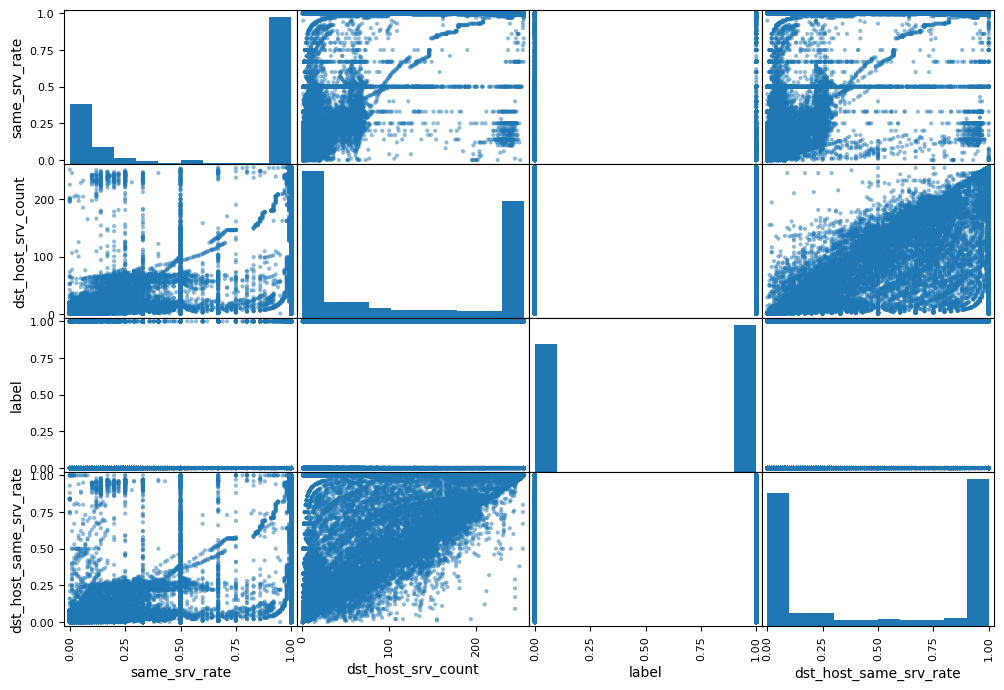

In [25]:
# Representar gráficamente las correlaciones de algunos atributos (En formato scatter matrix)
from pandas.plotting import scatter_matrix

attributes = ["same_srv_rate", "dst_host_srv_count", "label", "dst_host_same_srv_rate"]

scatter_matrix(df[attributes], figsize=(12,8))
plt.show()